In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
k_B = 1.381e-16 #erg/K
BAR_TO_BARYE = 1e6
m_p = 1.673e-24 # g
STEFAN_CONSTANT = 5.67e-5 #erg/(cm^2 * s * K^4)
N_A = 6.022e23

atomic_mass = np.array([0, 2, 1, 1, 1, 66.939, 63.866, 44.009, 4.002, 18.015, 16.04, 28.01, 17.031, 28.014, 33.998, 34.08, 55.845, 22.990, 39.098])

In [5]:
data = np.genfromtxt("t1400g316f3_m0.0_co1.0.pt", skip_header=2)
data[:, 1] = data[:, 1] * BAR_TO_BARYE

P_levels = data[:, 1]
T_levels = data[:, 2]

P_centers = (P_levels[:-1] + P_levels[:1])/2
T_centers = (T_levels[:-1] + T_levels[:1])/2

g = 316 #cm/s^2
teff = 1400 #K

μ_levels = np.sum(atomic_mass * data[:, 3:], axis = 1)/np.sum(data[:, 3:], axis = 1)
μ_centers = 1/2 * (μ_levels[1:] + μ_levels[:-1])

In [6]:
H_levels = k_B * T_levels/(μ_levels * m_p * g)
H_centers = k_B * T_centers/(μ_centers * m_p * g)

z_levels = np.zeros(data.shape[0])

for i in range(1, z_levels.shape[0]):
    delta_z = H_levels[i] * np.log(data[i, 1]/data[i-1, 1])

    z_levels[i] = z_levels[i-1] + delta_z

z_centers = (z_levels[1:] + z_levels[:-1])/2


In [11]:
c_p = 5/2 * k_B/(μ_centers * m_p) # erg / (g K)
ρ = μ_centers * P_centers * m_p/(k_B * T_centers) 
F = STEFAN_CONSTANT * teff**4

Γ = (T_levels[1:] - T_levels[:-1]) / (z_levels[1:] - z_levels[:-1])
Γ_a = g/c_p
lapse_ratio = Γ/Γ_a

dlnP = np.log(P_levels[:-1]/P_levels[1:])
lapse_ratio = (T_levels[:-1]- T_levels[1:])/dlnP/(2/7 * T_centers)
# lapse_ratio = np.zeros(data[:, 2].shape)
# lapse_ratio[:-1] =( ( data[:-1, 2] - data[1:, 2] ) 
#               / np.log(data[:-1, 1]/ data[1:, 1])
#               / ( 2.0/7.*data[:-1, 2] ))
# lapse_ratio[-1] = lapse_ratio[-2]

L = H_centers * np.array([max(0.1, lapse_ratio[i]) for i in range(len(Γ))])
# L = H * np.array([max(0.1, lapse_ratio[i]) for i in range(len(Γ))])
k_zz = H_centers/3 * (L/H_centers)**(4/3)* (k_B * F/(μ_centers*m_p * ρ * c_p))**(1/3)
# k_zz = 0.1 * H_centers

k_zz_levels = np.zeros(P_levels.shape)
k_zz_levels[1:-1] = (k_zz[1:] + k_zz[:-1])/2
k_zz_levels[0] = k_zz_levels[1] + 2* (k_zz[0] - k_zz_levels[1])
k_zz_levels[-1] = k_zz_levels[-2] + 2* (k_zz[-1] - k_zz_levels[-2])


# F_mod = F -  np.array([min(STEFAN_CONSTANT * T_centers[i]**4, 1/3 * (P_levels[:-1]/P_levels[:-1])[i] * F) for i in range(len(P_centers))])
# L_mod = H_centers 
# γ = 7/5
# kzz = ((γ-1)/γ * F_mod * H_centers**3/ρ)**(1/3) *(L_mod/H_centers)**(4/3)

z_centers = np.flip(z_levels[-1] - z_centers)
z_levels =np.flip(z_levels[-1] - z_levels)
P_centers = np.flip(P_centers)
P_levels = np.flip(P_levels)
T_centers = np.flip(T_centers)
k_zz_levels = np.flip(k_zz_levels)


In [12]:
with open("../run/carma/diamondbacktest_centers.txt", "w+") as f:
    for i in range(len(z_centers)):
        f.write(f"{z_centers[i]/100}\t{P_centers[i]/10}\t{T_centers[i]}\n")
        
with open("../run/carma/diamondbacktest_levels.txt", "w+") as f:
        for i in range(len(z_levels)):
            f.write(f"{z_levels[i]/100}\t{P_levels[i]/10}\t{k_zz_levels[i]}\n")

In [13]:
P_centers

array([2.76145889e+07, 2.39565889e+07, 2.07835889e+07, 1.80305889e+07,
       1.56420889e+07, 1.35700889e+07, 1.17725889e+07, 1.02135889e+07,
       8.86058890e+06, 7.68708890e+06, 6.66858890e+06, 5.78558890e+06,
       5.01908890e+06, 4.35428890e+06, 3.77753890e+06, 3.27718890e+06,
       2.84308890e+06, 2.46653890e+06, 2.13983890e+06, 1.85638890e+06,
       1.61048890e+06, 1.39718890e+06, 1.21213890e+06, 1.05158890e+06,
       9.12288900e+05, 7.91488900e+05, 6.86638900e+05, 5.95688900e+05,
       5.16838900e+05, 4.48373900e+05, 3.88993900e+05, 3.37478900e+05,
       2.92788900e+05, 2.54018900e+05, 2.20383900e+05, 1.91203900e+05,
       1.65888900e+05, 1.43928900e+05, 1.24873900e+05, 1.08343900e+05,
       9.40039000e+04, 8.15639000e+04, 7.07739000e+04, 6.14089000e+04,
       5.32889000e+04, 4.62414000e+04, 4.01284000e+04, 3.48249000e+04,
       3.02239000e+04, 2.62319000e+04, 2.27694000e+04, 1.97649000e+04,
       1.71589000e+04, 1.48979000e+04, 1.29359000e+04, 1.12344000e+04,
      

Text(0, 0.5, 'P [bar]')

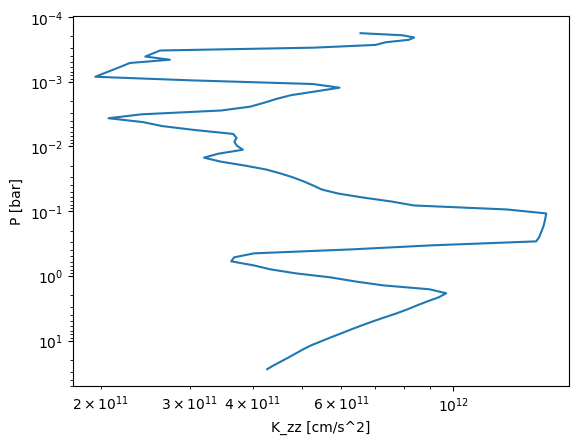

In [8]:
plt.plot(k_zz, P_centers/1e6)
# plt.plot(kzz, P_centers/1e6)

plt.gca().invert_yaxis()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("K_zz [cm/s^2]")
plt.ylabel("P [bar]")

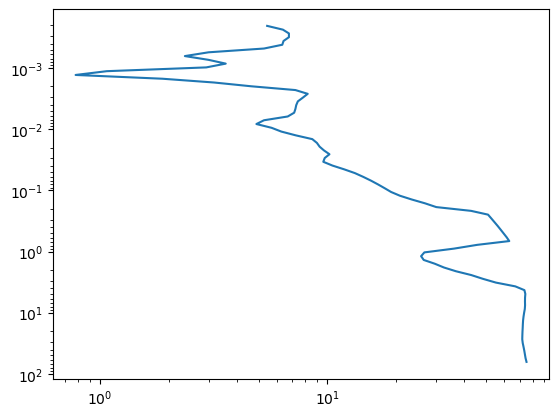

In [146]:
plt.plot((data[1:, 2] -data[:-1, 2]), data[1:, 1]/1e6)
plt.gca().invert_yaxis()
plt.xscale("log")
plt.yscale("log")

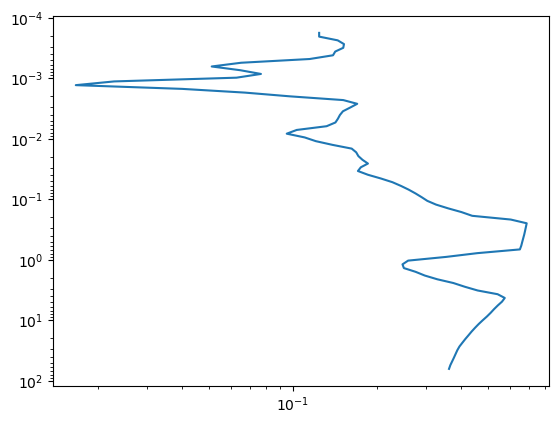

In [135]:
plt.plot(Γ/Γ_a, data[:, 1]/1e6)
plt.gca().invert_yaxis()
plt.xscale("log")
plt.yscale("log")

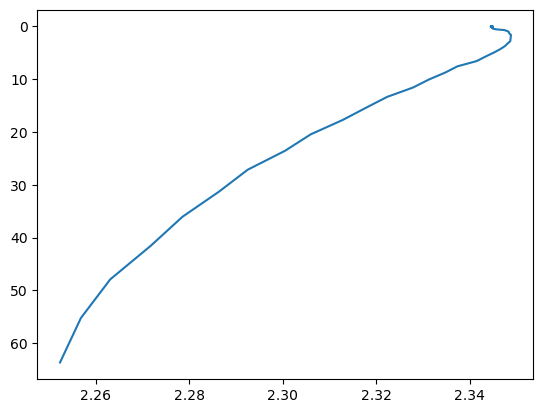

In [116]:
plt.plot(μ, data[:, 1]/1e6)
plt.gca().invert_yaxis()

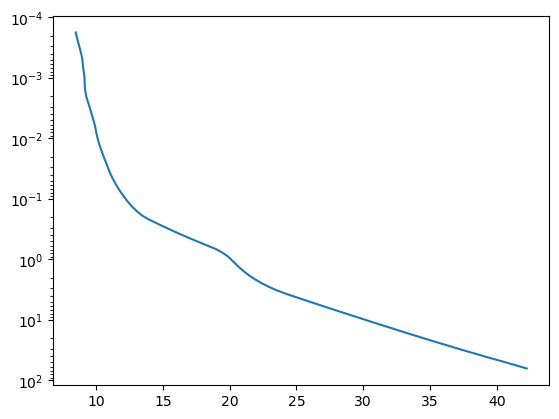

In [117]:
plt.plot(H/1e5, data[:, 1]/1e6)
plt.gca().invert_yaxis()
plt.yscale("log")

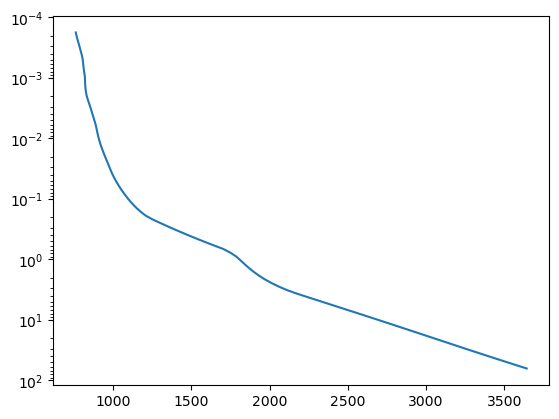

In [118]:

plt.plot(data[:, 2], data[:,1]/1e6)
plt.gca().invert_yaxis()
plt.yscale("log")

In [33]:
data[:, 1]

array([1.7780e-04, 2.0770e-04, 2.4250e-04, 2.8320e-04, 3.3070e-04,
       3.8630e-04, 4.5110e-04, 5.2680e-04, 6.1520e-04, 7.1840e-04,
       8.3900e-04, 9.7970e-04, 1.1442e-03, 1.3362e-03, 1.5604e-03,
       1.8223e-03, 2.1281e-03, 2.4852e-03, 2.9022e-03, 3.3893e-03,
       3.9580e-03, 4.6223e-03, 5.3979e-03, 6.3038e-03, 7.3617e-03,
       8.5971e-03, 1.0040e-02, 1.1725e-02, 1.3692e-02, 1.5990e-02,
       1.8673e-02, 2.1807e-02, 2.5466e-02, 2.9740e-02, 3.4731e-02,
       4.0559e-02, 4.7366e-02, 5.5314e-02, 6.4597e-02, 7.5437e-02,
       8.8097e-02, 1.0288e-01, 1.2015e-01, 1.4031e-01, 1.6385e-01,
       1.9135e-01, 2.2346e-01, 2.6096e-01, 3.0476e-01, 3.5590e-01,
       4.1562e-01, 4.8537e-01, 5.6682e-01, 6.6194e-01, 7.7303e-01,
       9.0275e-01, 1.0543e+00, 1.2312e+00, 1.4378e+00, 1.6791e+00,
       1.9608e+00, 2.2899e+00, 2.6742e+00, 3.1229e+00, 3.6470e+00,
       4.2590e+00, 4.9737e+00, 5.8084e+00, 6.7832e+00, 7.9215e+00,
       9.2508e+00, 1.0803e+01, 1.2616e+01, 1.4733e+01, 1.7206e

In [31]:
BAR_TO_BARYE

1000000.0

In [ ]:
wtmol_air = 2.3
rair = 8.3145e7/wtmol_air
c_p = 7.0/2.0 * rair
kzmin = 1e5
teff = 1500.0
kz = zeros(nz)
for k in range(nz):
  dp_layer = pl[k] - pl[k+1]
   dlnp = log( pl[k]/pl[k+1] )
   lapse_ratio = ( tl[k] - tl[k+1] ) / dlnp / ( 2.0/7.*t[k] )
   rho_atmos = p[k] / ( rair * t[k] )
   scale_h = rair * t[k] / gprof[k]
   mixl = max( 0.1, lapse_ratio ) * scale_h
   scalef_kz = 1.0/3.0
   chf = 5.67e-5 * teff**4.0
   kz[k] = scalef_kz * scale_h * (mixl/scale_h)**(4.0/3.0) * ( ( rair*chf ) / ( rho_atmos*c_p ) )**(1.0/3.0)
   kz[k] = max( kz[k], kzmin )